In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Index(['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
       'Unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')
Shape: (100000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   title               100000 non-null  object 
 5   release_date        99991 non-null   object 
 6   video_release_date  0 non-null       float64
 7   imdb_

/tmp/ipython-input-1287667555.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')


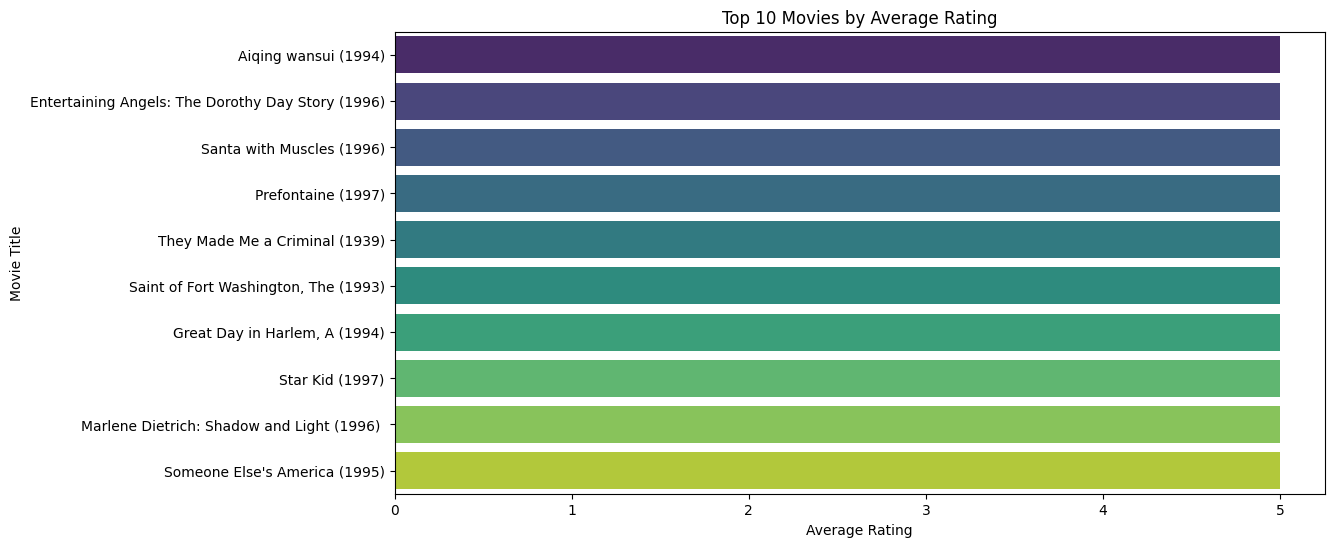

/tmp/ipython-input-1287667555.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='Genre', data=genre_ratings_df, palette='coolwarm')


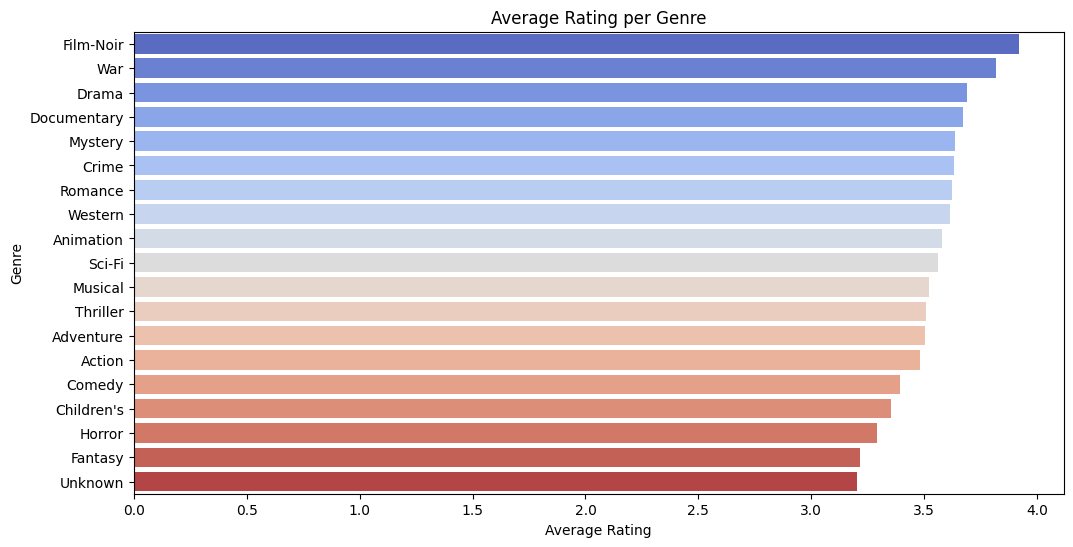

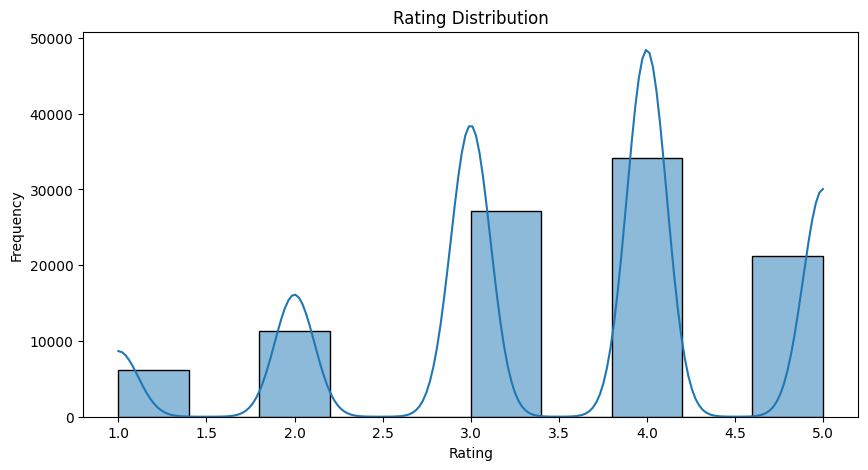

In [9]:
# ===============================
# 1️⃣ Import libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 2️⃣ Load datasets
# ===============================
# Ganti path/URL sesuai lokasi dataset di Colab/Drive
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-100k/movies.csv')      # movieId, title, genre
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-100k/ratings.csv')    # userId, movieId, rating, timestamp
print(movies.columns)
print(ratings.columns)


# Merge ratings + movies
df = pd.merge(ratings, movies, on='movie_id')
df.head()

# ===============================
# 3️⃣ EDA dasar
# ===============================
print("Shape:", df.shape)
print(df.info())
print(df.describe())

# Top 5 movies by number of ratings
top_movies_count = df['title'].value_counts().head(5)
print("\nTop 5 movies by number of ratings:")
print(top_movies_count)

# ===============================
# 4️⃣ Average rating per movie
# ===============================
avg_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 movies by average rating:")
print(avg_rating)

# Visualisasi top 10 movies by avg rating
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# ===============================
# 5️⃣ Average rating per genre
# ===============================
# Genre kolom ada di movies.csv mulai dari index ke-5
genre_cols = movies.columns[5:]

# Hitung rata-rata rating per genre
genre_ratings = {}
for genre in genre_cols:
    genre_ratings[genre] = df[df[genre] == 1]['rating'].mean()

# Ubah ke DataFrame untuk visualisasi
genre_ratings_df = pd.DataFrame(list(genre_ratings.items()), columns=['Genre', 'Avg_Rating'])
genre_ratings_df = genre_ratings_df.sort_values(by='Avg_Rating', ascending=False)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x='Avg_Rating', y='Genre', data=genre_ratings_df, palette='coolwarm')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# ===============================
# 6️⃣ Optional: Rating distribution
# ===============================
plt.figure(figsize=(10,5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

